# Extraction Des Données

In [ ]:
pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00


In [ ]:
pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.9/277.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
list = ['/content/etat_res_2022.pdf',
        '/content/etat_res_2019.pdf',
        '/content/etat_res_2016.pdf',
        '/content/etat_res_2015.pdf',
        '/content/etat_res_2011.pdf',
        '/content/etat_res_2008.pdf',
        '/content/etat_res_2007.pdf',
        '/content/etat_res_2005.pdf']

In [ ]:
from langchain.document_loaders import PyPDFLoader
import pandas as pd
import re

In [ ]:
etat_res = pd.DataFrame()

for path in list:
  loader = PyPDFLoader(path)
  pages = loader.load_and_split()
  p = pages[0]
  df = pd.DataFrame(p)
  df_test=pd.DataFrame()
  df_test['page_content'] = df[1].str.split('\n')[0]
  df_test["page_content"] = df_test["page_content"].str.replace('-', ' -')
  df_test['zouz'] = df_test["page_content"].str.extract(r'(.*-{0,1},\d{2,3})')[1:]
  df_test['zouz'][0] = df_test['page_content'][0]
  df_test['titres'] = df_test['zouz'].str.extract(r'(\D*)')
  df_test['titres'] = df_test['titres'].str.replace('-','')
  df_test['num'] = df_test['zouz'].str.extract(r'(-{0,1}\d.*)')
  df_test = df_test.drop('zouz', axis=1)
  df_test= df_test.reset_index(drop=True)
  df_test['num1']= df_test['num'].str.extract (r'(.*,\d{1,3})\s(.*)')[0]
  df_test['num2']= df_test['num'].str.extract (r'(.*,\d{1,3})\s(.*)')[1]
  df_test['num1'][0]=df_test['num'].str.extract(r'(.*\d{4})\s(.*\d{4})')[0][0]
  df_test['num2'][0]=df_test['num'].str.extract(r'(.*\d{4})\s(.*\d{4})')[1][0]
  df_test = df_test.dropna(axis=0, subset=["titres","num"])
  dic={}
  for i in range(len(df_test)) :
   dic[(df_test.iloc[i,1])] = [df_test.iloc[i,3],df_test.iloc[i,4]]
  df_fin=pd.DataFrame(dic)
  etat_res = pd.concat([etat_res, df_fin], axis=0 )

etat_res.shape

(16, 29)

In [ ]:
etat_res.columns

Index(['LIBELLE ', 'Revenus ', 'Autres Produits d'Exploitation ',
       'TOT AL DES PRODUITS D'EXPLOIT ATION ', 'Achat d'approvisionnements  ',
       'Charges de personnel  ',
       'Dotations aux amortissements et aux provisions  ',
       'Autres charges d'exploitation  ',
       'TOT AL DES CHARGES D'EXPLOIT ATION  ', 'RESUL T AT D'EXPLOIT ATION ',
       'Charges financières nettes  ', 'Produits financiers ',
       'Autres gains ordinaires ', 'Autres pertes ordinaires  ',
       'Résultat des activités ordinaires avant impôt ',
       'Impôt sur les bénéfices  ',
       'Résultat des activités ordinaires après impôt ',
       'Effet liés à des modifications comptables ',
       'Eléments Extraordinaires ', 'RESUL T AT NET DE L'ENSEMBLE CONSOLIDE ',
       'PART REVENANT AUX INTERETS MINORIT AIRES ', 'CONSOLIDANTE',
       'Achat d'approvisionnements ', 'Elements Extraordinaires  ',
       'RESUL T AT NET REVENANT A LA SOCIETE CONSOLIDANTE ',
       'Elements Extraordinaires ', 

In [ ]:
etat_res.reset_index(drop=True, inplace=True)

In [ ]:
etat_res.columns = etat_res.columns.str.strip()
etat_res.shape

(16, 29)

In [ ]:
#define function to merge columns with same names together
def same_merge(x): return ','.join(x[x.notnull()].astype(str))

#define new DataFrame that merges columns with same names together
etat_res = etat_res.groupby(level=0, axis=1).apply(lambda x: x.apply(same_merge, axis=1))

In [ ]:
etat_res.shape

(16, 24)

In [ ]:
etat_res.columns

Index(['Achat d'approvisionnements', 'Autres Produits d'Exploitation',
       'Autres charges d'exploitation', 'Autres gains ordinaires',
       'Autres pertes ordinaires', 'CONSOLIDANTE', 'Charges de personnel',
       'Charges financières nettes',
       'Dotations aux amortissements et aux provisions',
       'Effet liés à des modifications comptables', 'Elements Extraordinaires',
       'Eléments Extraordinaires', 'Impôt sur les bénéfices', 'LIBELLE',
       'PART REVENANT AUX INTERETS MINORIT AIRES', 'Produits financiers',
       'RESUL T AT D'EXPLOIT ATION', 'RESUL T AT NET DE L'ENSEMBLE CONSOLIDE',
       'RESUL T AT NET REVENANT A LA SOCIETE CONSOLIDANTE', 'Revenus',
       'Résultat des activités ordinaires après impôt',
       'Résultat des activités ordinaires avant impôt',
       'TOT AL DES CHARGES D'EXPLOIT ATION',
       'TOT AL DES PRODUITS D'EXPLOIT ATION'],
      dtype='object')

In [ ]:
import numpy as np
etat_res.replace('', np.nan, inplace=True)

In [ ]:
etat_res.isna().sum()

Achat d'approvisionnements                            0
Autres Produits d'Exploitation                        0
Autres charges d'exploitation                         0
Autres gains ordinaires                               0
Autres pertes ordinaires                              0
CONSOLIDANTE                                         12
Charges de personnel                                  0
Charges financières nettes                            0
Dotations aux amortissements et aux provisions        0
Effet liés à des modifications comptables             0
Elements Extraordinaires                              4
Eléments Extraordinaires                             12
Impôt sur les bénéfices                               0
LIBELLE                                               0
PART REVENANT AUX INTERETS MINORIT AIRES              0
Produits financiers                                   0
RESUL T AT D'EXPLOIT ATION                            0
RESUL T AT NET DE L'ENSEMBLE CONSOLIDE          

In [ ]:
etat_res['RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE'] = etat_res['RESUL T AT NET REVENANT A LA SOCIETE CONSOLIDANTE'].combine_first(etat_res['CONSOLIDANTE'])
etat_res = etat_res.drop(['RESUL T AT NET REVENANT A LA SOCIETE CONSOLIDANTE', 'CONSOLIDANTE'], axis=1)

In [ ]:
etat_res['Éléments Extraordinaires'] = etat_res['Elements Extraordinaires'].combine_first(etat_res['Eléments Extraordinaires'])
etat_res = etat_res.drop(['Elements Extraordinaires', 'Eléments Extraordinaires'], axis=1)

In [ ]:
etat_res.isna().sum()

Achat d'approvisionnements                         0
Autres Produits d'Exploitation                     0
Autres charges d'exploitation                      0
Autres gains ordinaires                            0
Autres pertes ordinaires                           0
Charges de personnel                               0
Charges financières nettes                         0
Dotations aux amortissements et aux provisions     0
Effet liés à des modifications comptables          0
Impôt sur les bénéfices                            0
LIBELLE                                            0
PART REVENANT AUX INTERETS MINORIT AIRES           0
Produits financiers                                0
RESUL T AT D'EXPLOIT ATION                         0
RESUL T AT NET DE L'ENSEMBLE CONSOLIDE             0
Revenus                                            0
Résultat des activités ordinaires après impôt      0
Résultat des activités ordinaires avant impôt      0
TOT AL DES CHARGES D'EXPLOIT ATION            

In [ ]:
etat_res.head()

,Achat d'approvisionnements,Autres Produits d'Exploitation,Autres charges d'exploitation,Autres gains ordinaires,Autres pertes ordinaires,Charges de personnel,Charges financières nettes,Dotations aux amortissements et aux provisions,Effet liés à des modifications comptables,Impôt sur les bénéfices,...,Produits financiers,RESUL T AT D'EXPLOIT ATION,RESUL T AT NET DE L'ENSEMBLE CONSOLIDE,Revenus,Résultat des activités ordinaires après impôt,Résultat des activités ordinaires avant impôt,TOT AL DES CHARGES D'EXPLOIT ATION,TOT AL DES PRODUITS D'EXPLOIT ATION,RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE,Éléments Extraordinaires
0,"-44349636,842","0,000","-1 662 508,808","204 436,214","-116 809,811","-2 287 538,658","-50 356,718","-1 433 216,277","0,000","-429 811,885",...,"763 275,951","1 957 792,796","2 328 526,547","51 690 693,381","2 328 526,547","2 758 338,432","-49 732 900,585","51 690 693,381","2 273 286,948","0,000"
1,"-40008808,109","0,000","-1 297 429,853","189 557,016","-113 135,182","-2 319 543,917","-90 593,435","-1 371 432,020","0,000","-400 625,547",...,"543 446,468","2 469 648,925","2 598 298,245","47 466 862,824","2 598 298,245","2 998 923,792","-44 997 213,899","47 466 862,824","2 536 744,568","0,000"
2,"-55539422,51","0,000","-1 399 524,416","169 494,352","-92 028,146","-2 492 511,006","-220 947,923","-1 126 080,580","0,000","-741 943,459",...,"695 194,540","2 425 870,079","2 235 639,443","62 983 408,591","2 235 639,443","2 977 582,902","-60557538,51","62 983 408,591","2 182 998,748","0,000"
3,"-52976459,59","3 356,734","-1 297 346,270","264 454,021","-112 511,972","-2 370 535,047","-313 738,131","-1 005 810,805","0,000","-583 796,000",...,"294 814,194","2 207 778,420","1 757 000,532","59 854 573,395","1 757 000,532","2 340 796,532","-57650151,71","59 857 930,129","1 718 467,495","0,000"
4,"-51 543 041,974","50 000,000","-1 116 982,683","150 280,688","-151 574,309","-2 331 587,293","-351 787,707","-907 269,459","0,000","-438 043,960",...,"207 465,975","1 853 276,937","1 138 204,346","57 702 158,346","1 269 617,624","1 707 661,584","-55 898 881,409","57 752 158,346","1 081 331,608","-131 413,278"


In [ ]:
etat_res.shape

(16, 22)

In [ ]:
etat_res.to_csv('Sorimex_Fin_Dataset.csv', index=True)

In [ ]:
etat_res.duplicated().sum()

0

In [ ]:
'''etat_res.rename(columns={"LIBELLE " : "LIBELLE",
                         "Revenus " : "Revenus",
                         "Autres Produits d'Exploitation " : "Autres Produits d'Exploitation",
                         "TOT AL DES PRODUITS D'EXPLOIT ATION" : "TOTAL DES PRODUITS D'EXPLOITATION",
                         "TOT AL DES CHARGES D'EXPLOIT ATION" : "TOTAL DES CHARGES D'EXPLOITATION",
                         "RESUL T AT D'EXPLOIT ATION " : "RESULTAT D'EXPLOITATION",
                         "Charges financières nettes  " : "Charges financières nettes",
                         "Produits financiers " : "Produits financiers",
                         "Autres gains ordinaires " : "Autres gains ordinaires",
                         "Autres pertes ordinaires  " : "Autres pertes ordinaires",
                         "Résultat des activités ordinaires avant impôt " : "Résultat des activités ordinaires avant impôt",
                         "Résultat des activités ordinaires après impôt " : "Résultat des activités ordinaires après impôt",
                         "Effet liés à des modifications comptables " : "Effets liés à des modifications comptables",
                         "Elements Extraordinaires " : "Eléments extraordinaires",
                         "Eléments Extraordinaires " : "Eléments extraordinaires",
                         "RESUL T AT NET DE L'ENSEMBLE CONSOLIDE " : "RESULTAT NET DE L'ENSEMBLE CONSOLIDE",
                         "PART REVENANT AUX INTERETS MINORIT AIRES " : "PART REVENANT AUX INTERETS MINORITAIRES",
                         "CONSOLIDANTE" : "RESULTAT NET REVENANT A LA SOCIETE CONSOLIDANTE",
                         "Achat d'approvisionnements " : "Achat d'approvisionnements ",
                         "Elements Extraordinaires  " : "Eléments extraordinaires",
                         "RESUL T AT NET REVENANT A LA SOCIETE CONSOLIDANTE " : "RESULTAT NET REVENANT A LA SOCIETE CONSOLIDANTE",
                         "RESUL T AT NET DE L'ENSEMBLE CONSOLIDE  " : "RESULTAT NET DE L'ENSEMBLE CONSOLIDE",
                         "RESUL T AT NET REVENANT A LA SOCIETE CONSOLIDANTE  " : "RESULTAT NET REVENANT A LA SOCIETE CONSOLIDANTE",
                         "PART REVENANT AUX INTERETS MINORIT AIRES" : "PART REVENANT AUX INTERETS MINORITAIRES"}, inplace=True)'''

'etat_res.rename(columns={"LIBELLE " : "LIBELLE",\n                         "Revenus " : "Revenus",\n                         "Autres Produits d\'Exploitation " : "Autres Produits d\'Exploitation",\n                         "TOT AL DES PRODUITS D\'EXPLOIT ATION" : "TOTAL DES PRODUITS D\'EXPLOITATION",\n                         "TOT AL DES CHARGES D\'EXPLOIT ATION" : "TOTAL DES CHARGES D\'EXPLOITATION",\n                         "RESUL T AT D\'EXPLOIT ATION " : "RESULTAT D\'EXPLOITATION",\n                         "Charges financières nettes  " : "Charges financières nettes",\n                         "Produits financiers " : "Produits financiers",\n                         "Autres gains ordinaires " : "Autres gains ordinaires",\n                         "Autres pertes ordinaires  " : "Autres pertes ordinaires",\n                         "Résultat des activités ordinaires avant impôt " : "Résultat des activités ordinaires avant impôt",\n                         "Résultat des activités o

# EDA

In [ ]:
etat_res.shape

(16, 22)

In [ ]:
etat_res.describe()

,Achat d'approvisionnements,Autres Produits d'Exploitation,Autres charges d'exploitation,Autres gains ordinaires,Autres pertes ordinaires,Charges de personnel,Charges financières nettes,Dotations aux amortissements et aux provisions,Effet liés à des modifications comptables,Impôt sur les bénéfices,...,Produits financiers,RESUL T AT D'EXPLOIT ATION,RESUL T AT NET DE L'ENSEMBLE CONSOLIDE,Revenus,Résultat des activités ordinaires après impôt,Résultat des activités ordinaires avant impôt,TOT AL DES CHARGES D'EXPLOIT ATION,TOT AL DES PRODUITS D'EXPLOIT ATION,RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE,Éléments Extraordinaires
count,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
unique,16,10,16,14,16,16,16,16,1,16,...,14,14,14,14,14,14,16,14,14,3
top,"-44349636,842","0,000","-1 662 508,808","154 538,182","-116 809,811","-2 287 538,658","-50 356,718","-1 433 216,277","0,000","-429 811,885",...,"294 585,096","1 636 283,036","1 171 666,159","55 943 054,813","1 171 666,159","1 588 552,369","-49 732 900,585","55 944 548,813","1 130 807,531","0,000"
freq,1,5,1,2,1,1,1,1,16,1,...,2,2,2,2,2,2,1,2,2,14


In [ ]:
etat_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Achat d'approvisionnements                       16 non-null     object
 1   Autres Produits d'Exploitation                   16 non-null     object
 2   Autres charges d'exploitation                    16 non-null     object
 3   Autres gains ordinaires                          16 non-null     object
 4   Autres pertes ordinaires                         16 non-null     object
 5   Charges de personnel                             16 non-null     object
 6   Charges financières nettes                       16 non-null     object
 7   Dotations aux amortissements et aux provisions   16 non-null     object
 8   Effet liés à des modifications comptables        16 non-null     object
 9   Impôt sur les bénéfices                      

# Analyse des tendances temporelles

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = etat_res.copy()

In [ ]:
# Convertir la colonne LIBELLE en format de date
data['LIBELLE'] = pd.to_datetime(data['LIBELLE'])

In [ ]:
data['LIBELLE']

0    2022-01-01
1    2021-01-01
2    2019-01-01
3    2018-01-01
4    2016-01-01
5    2015-01-01
6    2015-01-01
7    2014-01-01
8    2011-01-01
9    2010-01-01
10   2008-01-01
11   2007-01-01
12   2007-01-01
13   2006-01-01
14   2005-01-01
15   2004-01-01
Name: LIBELLE, dtype: datetime64[ns]

In [ ]:
data['LIBELLE'] = data['LIBELLE'] + pd.DateOffset(days=30)
data['LIBELLE'] = data['LIBELLE'].apply(lambda x: x.replace(month=12))

In [ ]:
data['LIBELLE']

0    2022-12-31
1    2021-12-31
2    2019-12-31
3    2018-12-31
4    2016-12-31
5    2015-12-31
6    2015-12-31
7    2014-12-31
8    2011-12-31
9    2010-12-31
10   2008-12-31
11   2007-12-31
12   2007-12-31
13   2006-12-31
14   2005-12-31
15   2004-12-31
Name: LIBELLE, dtype: datetime64[ns]

In [ ]:
data = data.drop_duplicates()

In [ ]:
# Définir la colonne LIBELLE comme index
data.set_index('LIBELLE', inplace=True)

In [ ]:
data.head()

,Achat d'approvisionnements,Autres Produits d'Exploitation,Autres charges d'exploitation,Autres gains ordinaires,Autres pertes ordinaires,Charges de personnel,Charges financières nettes,Dotations aux amortissements et aux provisions,Effet liés à des modifications comptables,Impôt sur les bénéfices,...,Produits financiers,RESUL T AT D'EXPLOIT ATION,RESUL T AT NET DE L'ENSEMBLE CONSOLIDE,Revenus,Résultat des activités ordinaires après impôt,Résultat des activités ordinaires avant impôt,TOT AL DES CHARGES D'EXPLOIT ATION,TOT AL DES PRODUITS D'EXPLOIT ATION,RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE,Éléments Extraordinaires
LIBELLE,,,,,,,,,,,,,,,,,,,,,
2022-12-31,"-44349636,842","0,000","-1 662 508,808","204 436,214","-116 809,811","-2 287 538,658","-50 356,718","-1 433 216,277","0,000","-429 811,885",...,"763 275,951","1 957 792,796","2 328 526,547","51 690 693,381","2 328 526,547","2 758 338,432","-49 732 900,585","51 690 693,381","2 273 286,948","0,000"
2021-12-31,"-40008808,109","0,000","-1 297 429,853","189 557,016","-113 135,182","-2 319 543,917","-90 593,435","-1 371 432,020","0,000","-400 625,547",...,"543 446,468","2 469 648,925","2 598 298,245","47 466 862,824","2 598 298,245","2 998 923,792","-44 997 213,899","47 466 862,824","2 536 744,568","0,000"
2019-12-31,"-55539422,51","0,000","-1 399 524,416","169 494,352","-92 028,146","-2 492 511,006","-220 947,923","-1 126 080,580","0,000","-741 943,459",...,"695 194,540","2 425 870,079","2 235 639,443","62 983 408,591","2 235 639,443","2 977 582,902","-60557538,51","62 983 408,591","2 182 998,748","0,000"
2018-12-31,"-52976459,59","3 356,734","-1 297 346,270","264 454,021","-112 511,972","-2 370 535,047","-313 738,131","-1 005 810,805","0,000","-583 796,000",...,"294 814,194","2 207 778,420","1 757 000,532","59 854 573,395","1 757 000,532","2 340 796,532","-57650151,71","59 857 930,129","1 718 467,495","0,000"
2016-12-31,"-51 543 041,974","50 000,000","-1 116 982,683","150 280,688","-151 574,309","-2 331 587,293","-351 787,707","-907 269,459","0,000","-438 043,960",...,"207 465,975","1 853 276,937","1 138 204,346","57 702 158,346","1 269 617,624","1 707 661,584","-55 898 881,409","57 752 158,346","1 081 331,608","-131 413,278"


In [ ]:
for col in data.columns:
    data[col]=data[col].apply(lambda x :''.join(re.findall('-|\d+', str(x))))

In [ ]:
for col in data.columns:
  if col != 'LIBELLE':
    data[col] = data[col].astype('float')

In [ ]:
data.dtypes

Achat d'approvisionnements                         float64
Autres Produits d'Exploitation                     float64
Autres charges d'exploitation                      float64
Autres gains ordinaires                            float64
Autres pertes ordinaires                           float64
Charges de personnel                               float64
Charges financières nettes                         float64
Dotations aux amortissements et aux provisions     float64
Effet liés à des modifications comptables          float64
Impôt sur les bénéfices                            float64
PART REVENANT AUX INTERETS MINORIT AIRES           float64
Produits financiers                                float64
RESUL T AT D'EXPLOIT ATION                         float64
RESUL T AT NET DE L'ENSEMBLE CONSOLIDE             float64
Revenus                                            float64
Résultat des activités ordinaires après impôt      float64
Résultat des activités ordinaires avant impôt      float

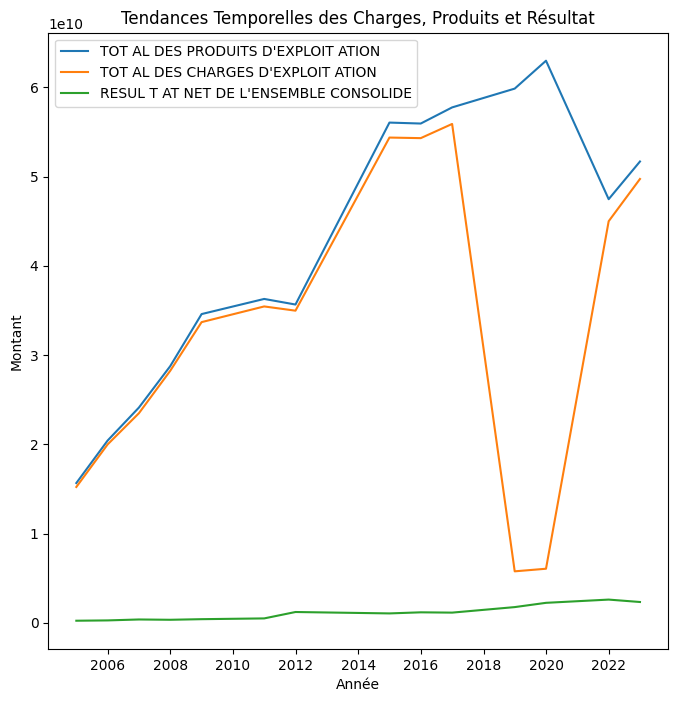

In [ ]:
selected_columns = ["TOT AL DES PRODUITS D'EXPLOIT ATION", "TOT AL DES CHARGES D'EXPLOIT ATION", "RESUL T AT NET DE L'ENSEMBLE CONSOLIDE"]

plt.figure(figsize=(8, 8))
for col in selected_columns:
    sns.lineplot(x=data.index, y=abs(data[col]), label=col)

plt.title('Tendances Temporelles des Charges, Produits et Résultat')
plt.xlabel('Année')
plt.ylabel('Montant')
plt.legend()
plt.show()

In [ ]:
data.columns

Index(['Achat d'approvisionnements', 'Autres Produits d'Exploitation',
       'Autres charges d'exploitation', 'Autres gains ordinaires',
       'Autres pertes ordinaires', 'Charges de personnel',
       'Charges financières nettes',
       'Dotations aux amortissements et aux provisions',
       'Effet liés à des modifications comptables', 'Impôt sur les bénéfices',
       'PART REVENANT AUX INTERETS MINORIT AIRES', 'Produits financiers',
       'RESUL T AT D'EXPLOIT ATION', 'RESUL T AT NET DE L'ENSEMBLE CONSOLIDE',
       'Revenus', 'Résultat des activités ordinaires après impôt',
       'Résultat des activités ordinaires avant impôt',
       'TOT AL DES CHARGES D'EXPLOIT ATION',
       'TOT AL DES PRODUITS D'EXPLOIT ATION',
       'RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE',
       'Éléments Extraordinaires'],
      dtype='object')

In [ ]:
data = data.drop_duplicates()

In [ ]:
import plotly.express as px
fig = px.bar(data, x=data.index, y="RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE")
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall( name = "20", orientation = "v", measure = ["relative"], x = data.index, y=data["RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE"] ))
fig.show()

<Axes: >

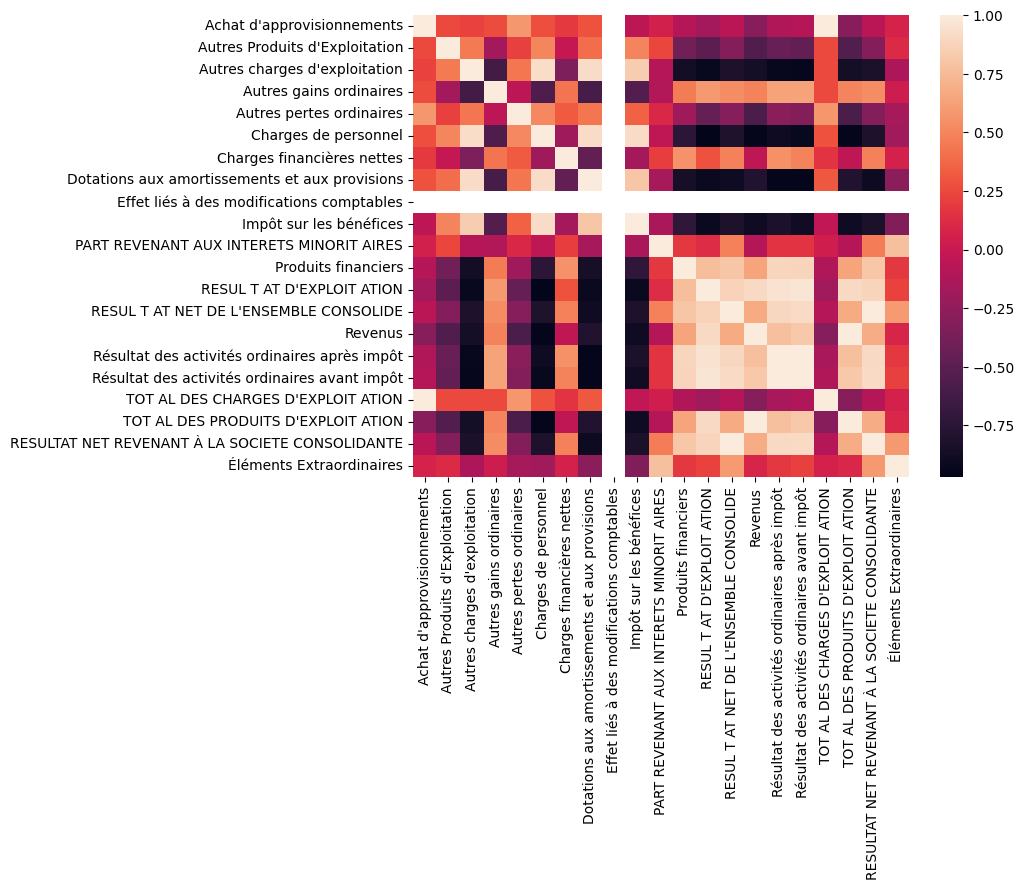

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr())

# Prédiction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
Y=data["RESUL T AT NET DE L'ENSEMBLE CONSOLIDE"]
X=data.drop(["RESUL T AT NET DE L'ENSEMBLE CONSOLIDE"], axis=1)

In [ ]:
x_train,x_test,y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict (x_test)
y_pred

array([3.89567914e+08, 3.77064301e+08, 2.38129803e+09])

In [ ]:
print ('MSE = ' ,mean_squared_error (y_test,y_pred) \
       , '\nR2 : ' , r2_score(y_test , y_pred) )

MSE =  1008076401920888.1 
R2 :  0.9987968510198535


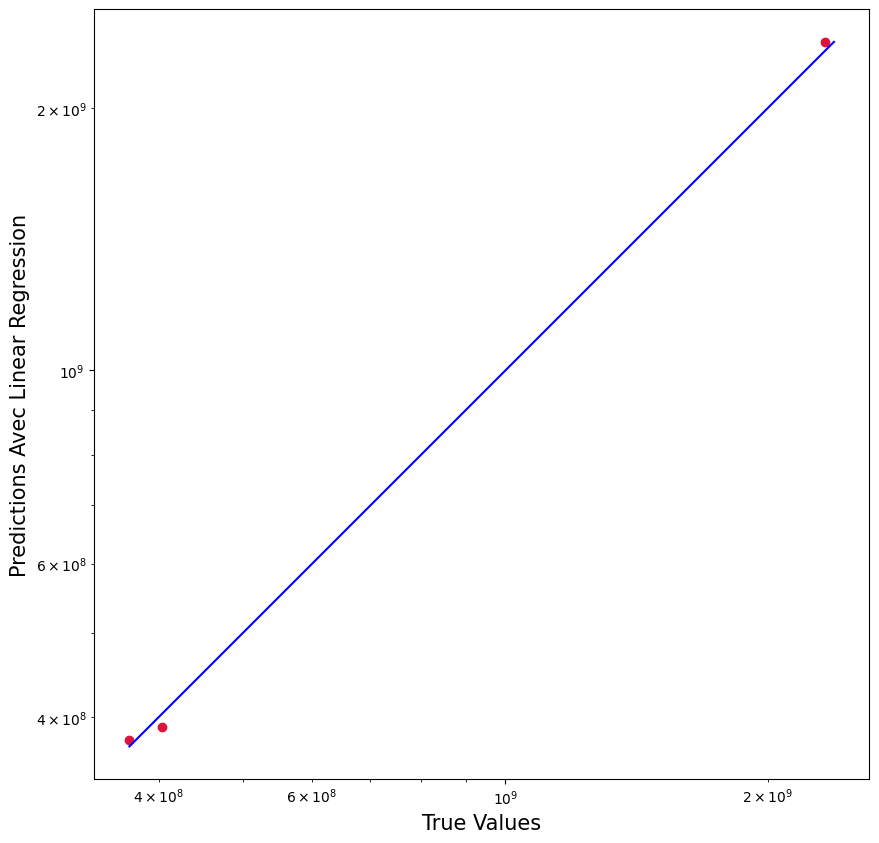

In [ ]:
# LR
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions Avec Linear Regression', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")

In [ ]:
#SVR
svr_rbf.fit(x_train,y_train)
y_pred_rbf=svr_rbf.predict(x_test)
print ('MSE = ' ,mean_squared_error (y_test,y_pred_rbf) \
       , '\nR2 : ' , r2_score(y_test , y_pred_rbf) )

MSE =  8.381007851951684e+17 
R2 :  -0.0002814301040530154


In [ ]:
svr_lin.fit(x_train,y_train)
y_pred_lin=svr_lin.predict(x_test)
print ('MSE = ' ,mean_squared_error (y_test,y_pred_lin) \
       , '\nR2 : ' , r2_score(y_test , y_pred_lin) )

MSE =  993537847972464.1 
R2 :  0.9988142029252473


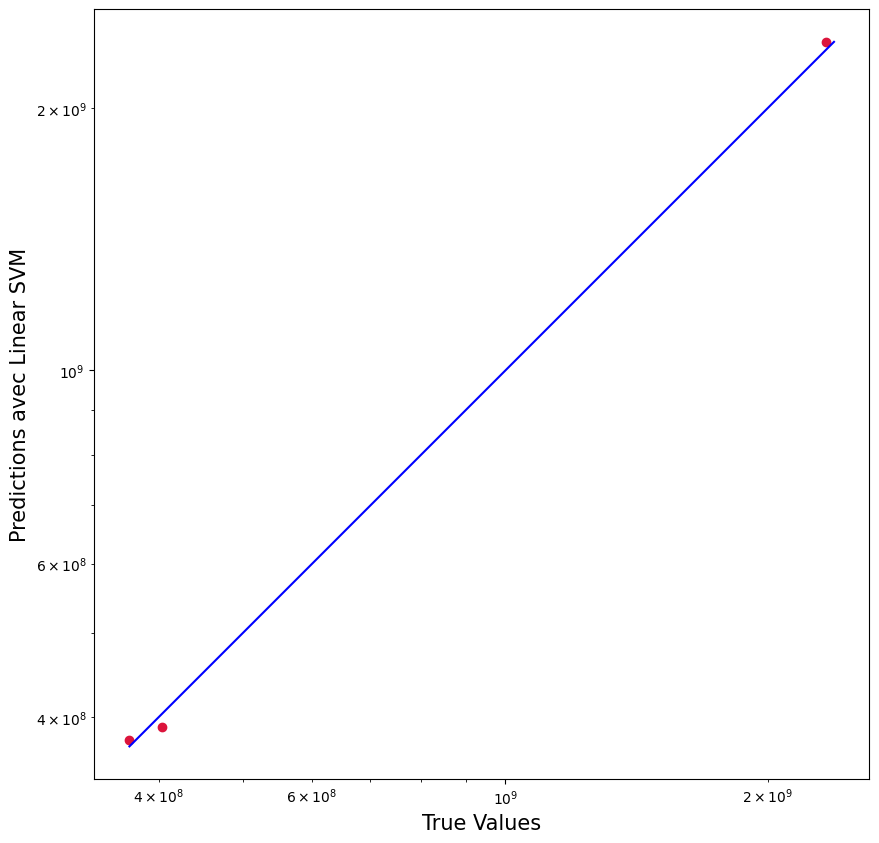

In [ ]:
#SVM L
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_lin, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_lin), max(y_test))
p2 = min(min(y_pred_lin), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions avec Linear SVM', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
#RF
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print ('MSE = ' ,mean_squared_error (y_test,y_pred_rf) \
       , '\nR2 : ' , r2_score(y_test , y_pred_rf) )

MSE =  7.632861636302163e+16 
R2 :  0.9089010547631365


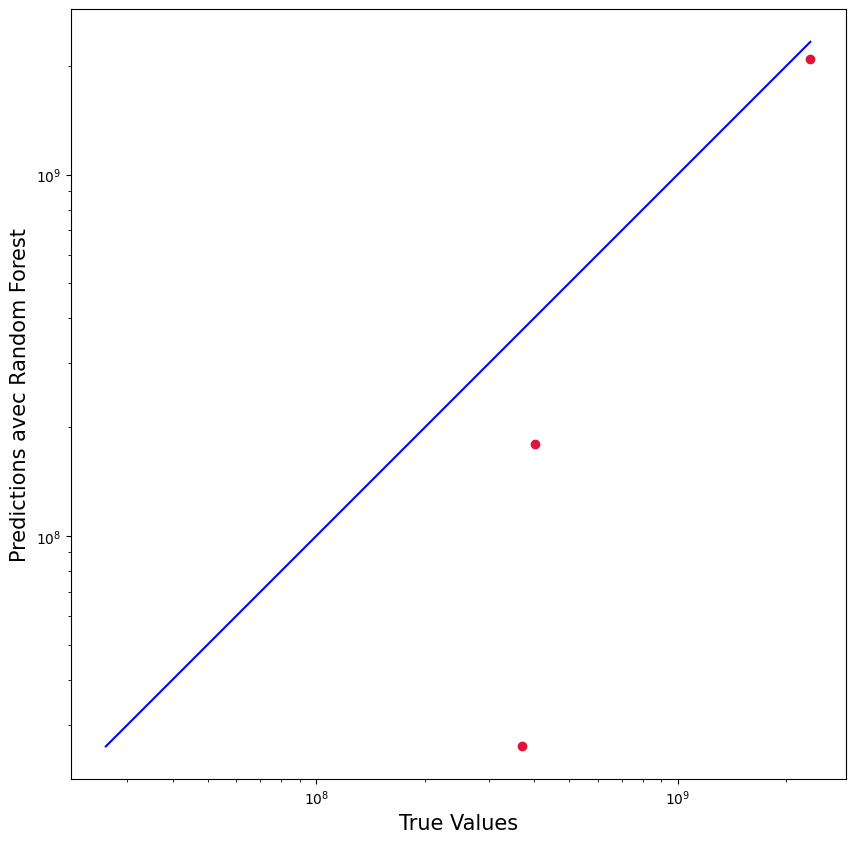

In [ ]:
#RF
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_rf, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_rf), max(y_test))
p2 = min(min(y_pred_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions avec Random Forest', fontsize=15)
plt.axis('equal')
plt.show()

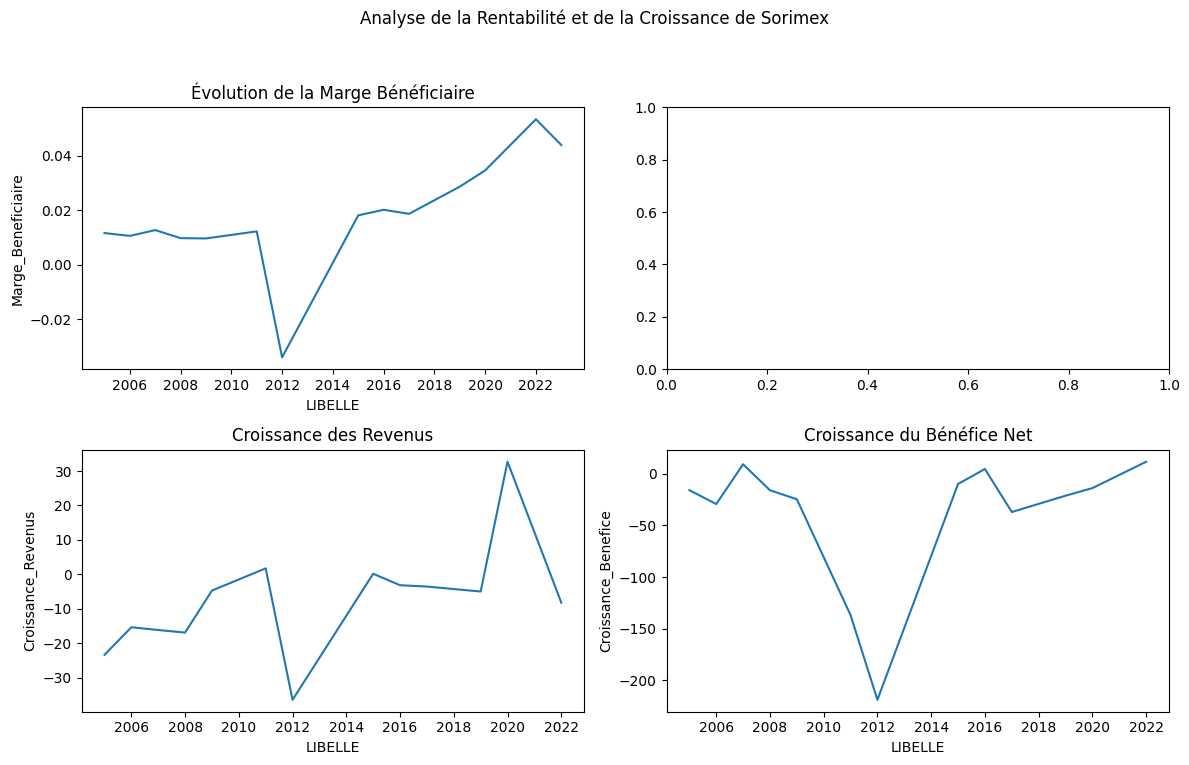

In [ ]:
# Calcul des ratios de rentabilité
data['Marge_Beneficiaire'] = data['RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE'] / data["TOT AL DES PRODUITS D'EXPLOIT ATION"]

# Calcul des taux de croissance
data['Croissance_Revenus'] = data["TOT AL DES PRODUITS D'EXPLOIT ATION"].pct_change() * 100
data['Croissance_Benefice'] = data['RESULTAT NET REVENANT À LA SOCIETE CONSOLIDANTE'].pct_change() * 100

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Analyse de la Rentabilité et de la Croissance de Sorimex')

# Rentabilité
sns.lineplot(x=data.index, y='Marge_Beneficiaire', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Évolution de la Marge Bénéficiaire')


# Croissance
sns.lineplot(x=data.index, y='Croissance_Revenus', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Croissance des Revenus')

sns.lineplot(x=data.index, y='Croissance_Benefice', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Croissance du Bénéfice Net')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
data[['Marge_Beneficiaire', 'Croissance_Revenus', 'Croissance_Benefice']]

,Marge_Beneficiaire,Croissance_Revenus,Croissance_Benefice
LIBELLE,,,
2022-12-31,0.043979,NaN,NaN
2021-12-31,0.053442,-8.171356,11.589281
2019-12-31,0.034660,32.689217,-13.944873
2018-12-31,0.028709,-4.962384,-21.279502
2016-12-31,0.018724,-3.517950,-37.075818
2015-12-31,0.020213,-3.129943,4.575463
2014-12-31,0.018169,0.190744,-9.940974
2011-12-31,-0.033931,-36.376222,-218.818675
2010-12-31,0.012287,1.759311,-136.849083
